"""
Urban Heat Island (UHI) Analysis - Bengaluru (2022)

This script reads a GeoTIFF file (exported from Google Earth Engine) containing
average daytime Land Surface Temperature (LST) data for 2022. It:
- Reads raster data
- Masks no-data values
- Plots a heatmap of UHI intensity
- Calculates mean, min, and max temperatures

NOTE: This analysis uses a rectangular 30 km bounding box around Bengaluru
instead of precise city boundary shapefiles. Future improvements can use
official administrative boundaries for higher accuracy.
"""


In [1]:
## Install the necessary libraries
!pip install rasterio matplotlib numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 81.0 MB/s eta 0:00:00


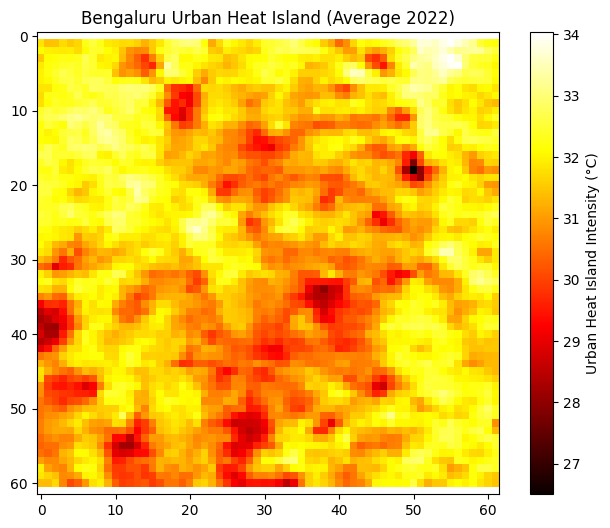

Mean UHI: 31.43 °C
Min UHI: 26.50 °C
Max UHI: 34.03 °C


In [2]:
## Import necessary libraries
import rasterio
import matplotlib.pyplot as plt
import numpy as np


##-------------------------------------------------------
## MAIN EXECUTION
##-------------------------------------------------------



# Path to the downloaded GeoTIFF
tif_path = "Bengaluru_LST_2022.tif"

# Open raster
with rasterio.open(tif_path) as src:
    data = src.read(1)  # read first band
    profile = src.profile

# Mask no-data values
data = np.where(data == src.nodata, np.nan, data)

# Plot heatmap
plt.figure(figsize=(8,6))
plt.imshow(data, cmap='hot', interpolation='nearest')
plt.colorbar(label='Urban Heat Island Intensity (°C)')
plt.title('Bengaluru Urban Heat Island (Average 2022)')
plt.savefig("sample_output_map.png", dpi=300)
plt.show()

# Calculate statistics
mean_val = np.nanmean(data)
min_val = np.nanmin(data)
max_val = np.nanmax(data)

print(f"Mean UHI: {mean_val:.2f} °C")
print(f"Min UHI: {min_val:.2f} °C")
print(f"Max UHI: {max_val:.2f} °C")
